# Evoluční algoritmy - spojitá a kombinatorická optimalizace

Minule jsem si ukazovali jednoduchý genetický algoritmus, který pracoval s binárními jedinci. Dnes se podíváme na spojité a celočíselné reprezentace jedinců a na další druhy evolučních operátorů.

## Minimalizace Rastrigin funkce

V následujícím cvičení si vyzkoušíme napsat jednoduchý evoluční algoritmus pro minimalizace [Rastrigin funkce](https://en.wikipedia.org/wiki/Rastrigin_function). Tato funkce je typickým příkladem nelineární funkce a běžně se používá při testování chování optimalizačních algoritmů. Nalezení jejího minima je složité, protože obsahuje spoustu lokálních minim. 



In [2]:
import numpy as np
import random
import copy
import math
%matplotlib inline
import matplotlib.pyplot as plt

Nejprve si definujem, jak tedy vypadá ona výše zmíněná funkce, kterou budeme chtít minimalizovat. Potom je třeba si rozmyslet, jak bude vypadat jedinec. Bude to bude floating point vektor, kde hodnoty budou čísla z intervalu [-5.12,5.12]. Pro něj si napíšeme svoje operátory křížení a mutace. Křížení může být aritmetické, například vážený průměr dvou jedinců, nebo strukturální, kdy opět prohazujeme části jedinců. Mutace může být buď netížená, což znamená, že se pro mutovanou pozici vygeneruje nové číslo z daného rozsahu hodnot, nebo zatížená, kdy k hodnotě v jedinci přičtu nějaké číslo z normálního rozdělení s danou odchylkou (například 1) a nulovou střední hodnotou.

In [3]:
# hodnota fitness funkce je vlastne hodnata rastrigin funkce v danem bode
def fitness(individual):
    N = len(individual)
    A = 10
    value = A*N
    for i in range(0,len(individual)):
        value += individual[i]**2 - A*math.cos(2*math.pi*individual[i])
    return -value, 

# nezatizena mutace, ktera pro mutovanou pozici vybere nove cislo z rozsahu hodnot
def mutation_switch(population,individual_mutation_prob=0.2,value_mutation_prob=0.1):
    new_population = []
    for i in range(0,len(population)):
        individual = copy.deepcopy(population[i])
        if random.random()< individual_mutation_prob:
            for i in range(0,len(individual)):
                if random.random() < value_mutation_prob:
                    individual[i] = np.random.uniform(-5.12, 5.12)
        new_population.append(individual)
    return new_population

# krizeni pomoci prumer dvou hodnot
def crossover_mean(population, cross_prob=0.8, alpha=0.25):
    new_population = []
    
    for i in range(0,len(population)//2):
        indiv1 = copy.deepcopy(population[2*i])
        indiv2 = copy.deepcopy(population[2*i+1])
        child1 = indiv1
        child2 = indiv2
        if random.random()<cross_prob:
            for i in range(0, len(indiv1)):
                child1[i] = alpha*indiv1[i] + (1-alpha)*indiv2[i]
                child2[i] = (1-alpha)*indiv1[i] + alpha*indiv2[i]
        new_population.append(child1)
        new_population.append(child2)
        
    return new_population

# definujeme si funkci na na vytvoreni nahodne populace
def random_population(population_size, individual_size):
    population = []
    
    for i in range(0,population_size):
        individual = np.random.uniform(-5.12, 5.12, size=(individual_size,))
        population.append(individual)
        
    return population

# definujeme si turnajovou selekci 
def selection(population,fitness_value, k): 
    new_population = []
    for i in range(0,len(population)):
        individuals = []
        fitnesses = []
        for _ in range(0,k):
            idx = random.randint(0,len(population)-1)
            individuals.append(population[idx])
            fitnesses.append(fitness_value[idx])
        new_population.append(copy.deepcopy(individuals[np.argmax(fitnesses)]))
    return new_population 

Nyní si stejně jako v minulé hodině definujeme celý evoluční algoritmus a pakho pustíme a sledujeme, co se bude dít.

In [4]:
def evolution(population_size, individual_size, max_generations):
    max_fitness = []
    population = random_population(population_size,individual_size)
    
    for i in range(0,max_generations):
        fitness_value = list(map(fitness, population))
        max_fitness.append(max(fitness_value))
        parents = selection(population,fitness_value,2)
        children = crossover_mean(parents)
        mutated_children = mutation_switch(children)
        population = mutated_children
        
    # spocitame fitness i pro posledni populaci
    fitness_value = list(map(fitness, population))
    max_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    return best_individual, population, max_fitness

best fitness:  (-11.23283067949744,)
best individual:  [-0.02104797  0.04801636 -0.97683311 -1.02115171  0.07349749 -0.98460378
 -0.93270877  0.8877577  -0.06097069  0.06305119]


Text(0.5, 0, 'Generace')

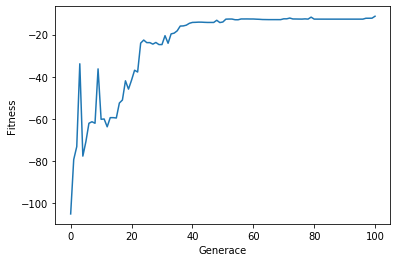

In [6]:
best, population, max_fitness = evolution(population_size=100,individual_size=10,max_generations=100)

print('best fitness: ', fitness(best))
print('best individual: ', best)


plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')


## Úkol na cvičení

V kódu výše je naprogramovaná nejjednodušší mutace -- nezatížená. Zkuste si napsat alespoň dva další druhy mutace z následujích možností a porovnat, jak se bude evoluční algoritmus chovat.
1. Zatížená mutace, kdy se k hodnotě v jedinci přičítá číslo z normalního rozdělení se střední hodnotou 0 a rozptylem sigma. Sigma se třeba navíc může během každých n generací postupně snižovat. 

2. Mutace je s 1/5 pravidlem, která se používá hlavně u evolučních strategií a probíhá podobně jako zatížená mutace: přičítá k hodnotě číslo z náhodného rozdělení s 0 střední hodnotou a rozptylem sigma. Sigma se updatuje v každém kroku následovně: máme jedince a podíváme se, kolik je v populaci jedinců lepších než ten náš. Sigmu pak upravíme pomocí jednoduché rovnice: sigma = sigma * e^(počet_lepších_jedinců/počet_všech_jedinců-1/5).

3. Mutace z diferenciální evoluce, která vybere náhodně pro daného jedince dva další a složku po složce dělá rozdíl jejich hodnot a ten navíc vynásobí nějakou konstantou (třeba 0.8) a to pak přičte k hodnotám v původním jedinci. 

Můžete samozřejmě zkusit vymyslet i nějakou vlastní mutaci, nebo třeba zkusit vypnout mutaci nebo vypnout křížení a sledovat, co se bude s evolucí dít.




## Deap knihovna

Nyní si opět vyzkoušíme přepsat výše zmíněný problém minimalizace Rastrigin funkce pomocí operátorů knihovny DEAP, abychom si lépe vyzkoušeli, jak se s ní pracuje a jak v ní tvořit svoje vlastní operátory, které se nám budou hodit příští hodinu u genetického programování.

In [9]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

Pro jistotu si znovu definujeme vlastní funkce mutace, křížení a fitness funkci.

In [10]:
def rastring_function(individual):
    N = len(individual)
    A = 10
    value = A*N
    for i in range(0,len(individual)):
        value += individual[i]**2 - A*math.cos(2*math.pi*individual[i])
    return value, 

# nezatizena mutace, ktera pro mutovanou pozici vybere nove cislo z rozsahu hodnot
def mutation_switch(individual,indpb):
    for i in range(0,len(individual)):
        if random.random() < indpb:
            individual[i] = np.random.uniform(-5.12, 5.12)
    return individual,

# zatizena mutace
def mutation_switch_biased(individual,indpb):
    for i in range(0,len(individual)):
        if random.random() < indpb:
            sigma = 0.1
            individual[i] += np.random.normal(0, sigma)
    return individual,

# krizeni pomoci prumer dvou hodnot
def crossover_mean(individual1, individual2, alpha=0.25):
    child1 = individual1
    child2 = individual2
    for i in range(0, len(individual1)):
        child1[i] = alpha*individual1[i] + (1-alpha)*individual2[i]
        child2[i] = (1-alpha)*individual1[i] + alpha*individual2[i]
    return child1, child2

Pak si zadefinujeme nový toolbox a přídáme do něj naše operátory. 

In [11]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # -1 protoze chci minimalizovat funkci
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_float", random.uniform,-5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", rastring_function)
toolbox.register("mate", crossover_mean)
toolbox.register("mutate", mutation_switch, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)


Na závěr pustíme celou eveluci a můžeme sledovat, jak se nám hledání minima daří, nebo nedaří.

In [12]:
pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=100,
                               stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max    
0  	300   	75.4589	20.4498	19.3501	139.755
1  	249   	57.5574	16.8272	18.2719	105.154
2  	252   	51.3594	14.9436	11.7028	98.7759
3  	246   	46.0865	13.7942	8.87847	83.7973
4  	260   	42.3435	14.4533	8.95759	83.4547
5  	245   	36.8815	15.3528	1.9439 	106.341
6  	260   	35.0286	15.3776	1.66259	76.2746
7  	259   	30.4545	13.1559	1.9439 	79.5094
8  	257   	26.38  	12.7137	1.32345	61.6738
9  	260   	21.896 	11.8751	1.83196	68.2713
10 	253   	17.6297	11.0178	1.95961	57.6704
11 	246   	13.1503	9.83916	2.01301	52.9848
12 	264   	7.92191	7.84877	1.96445	46.6823
13 	247   	5.20565	6.45628	1.94934	43.9562
14 	241   	3.69119	5.43167	1.75156	59.5523
15 	257   	3.54568	6.1601 	1.66414	48.3366
16 	248   	3.74999	7.90392	1.65877	69.056 
17 	264   	3.62641	6.88929	1.65811	49.3553
18 	247   	4.05326	9.4874 	1.66141	77.9585
19 	240   	2.59239	4.69972	1.66431	40.6137
20 	249   	2.63148	4.4928 	1.66132	32.3832
21 	239   	3.08074	6.58386	1.66132	52.4485
22 	261   	

## Domácí úkol - Batoh

Za domácí úkol budete mít vyřešit pomocí evolučního algoritmu problém batohu, který spočívá v tom, že máme batoh kapacity C a N předmětů, každý s cenou c_i a objemem v_i a chceme vybrat takové věci, abychom maximalizovali zisk a zároveň abychom nepřekročili kapacitu batohu. 

